In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import normalize

pd.options.display.max_columns = 10
pd.options.display.max_rows = 500

plt.style.use('fivethirtyeight')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

data = pd.read_csv('final_data/clean_english_data.csv')

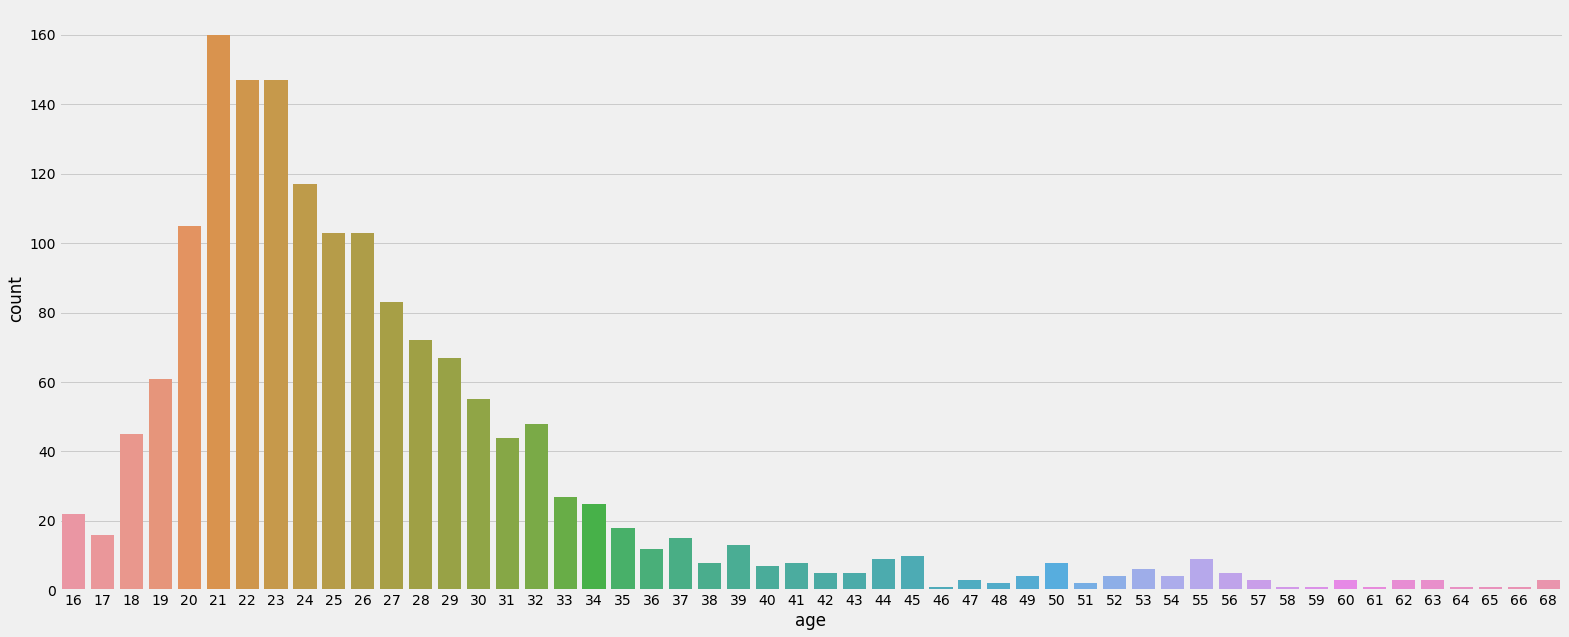

In [3]:
plt.figure(figsize=(24,10))
data.age = data.age.astype('int')
sns.countplot(x='age', data=data)

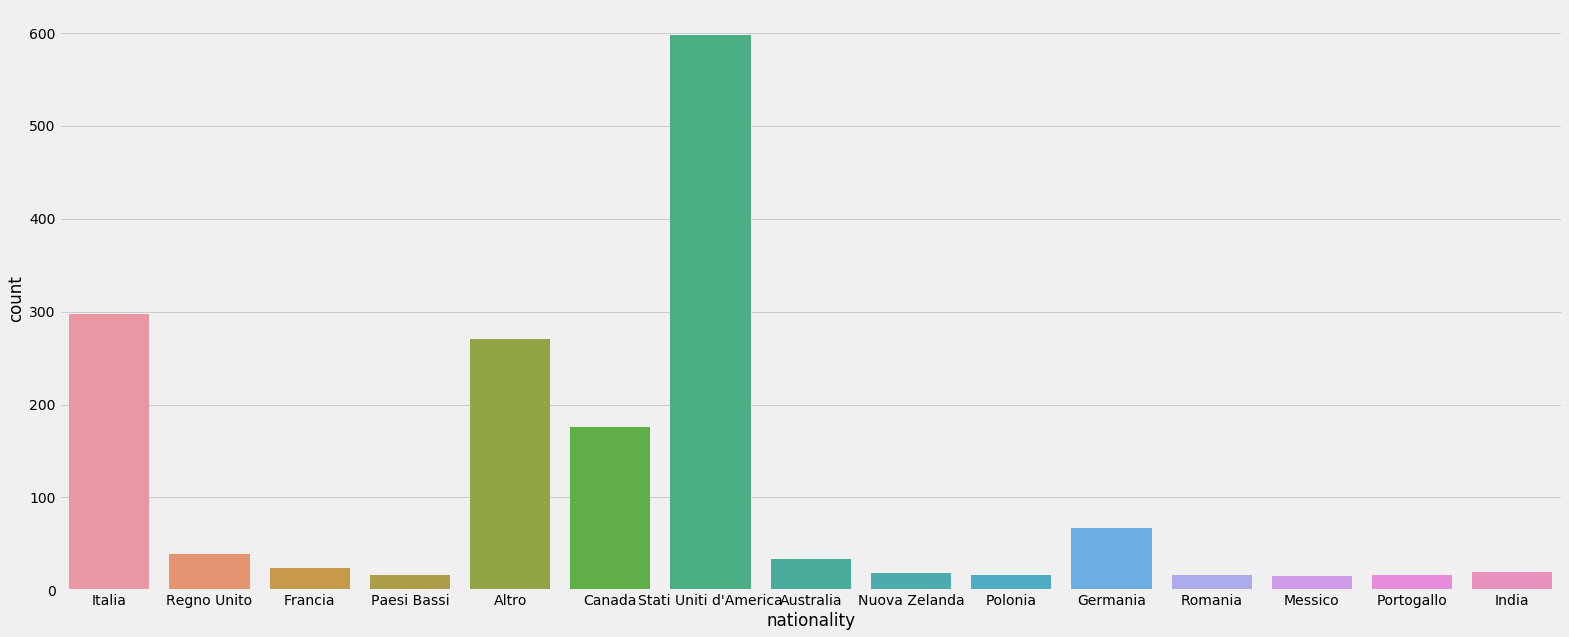

In [4]:
plt.figure(figsize=(24,10))
tmp = data.copy()
vc = tmp.nationality.value_counts()
tmp.nationality = tmp.nationality.apply(lambda x: 'Altro' if vc[x] < 15 else x)
tmp.nationality = tmp.nationality.apply(lambda x: "Stati Uniti d'America" if 'America' in x else x)
sns.countplot(x='nationality', data=tmp)


## Univariate EDA

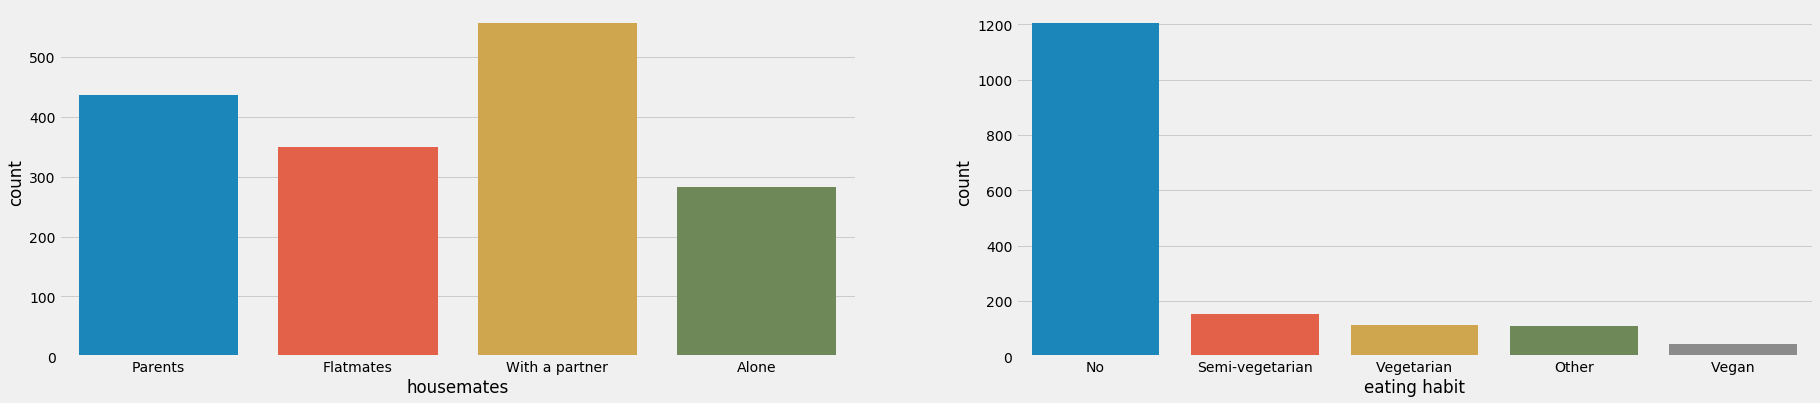

In [5]:
fig, axis = plt.subplots(1,2,figsize=(28,6))
sns.countplot(x='housemates', data=data, ax=axis[0])
sns.countplot(x='eating habit', data=data, ax=axis[1])

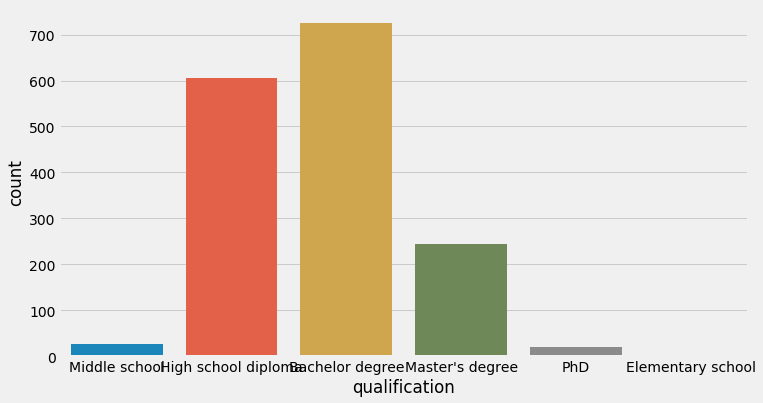

In [6]:
plt.figure(figsize=(11,6))
sns.countplot(x='qualification', data=data)

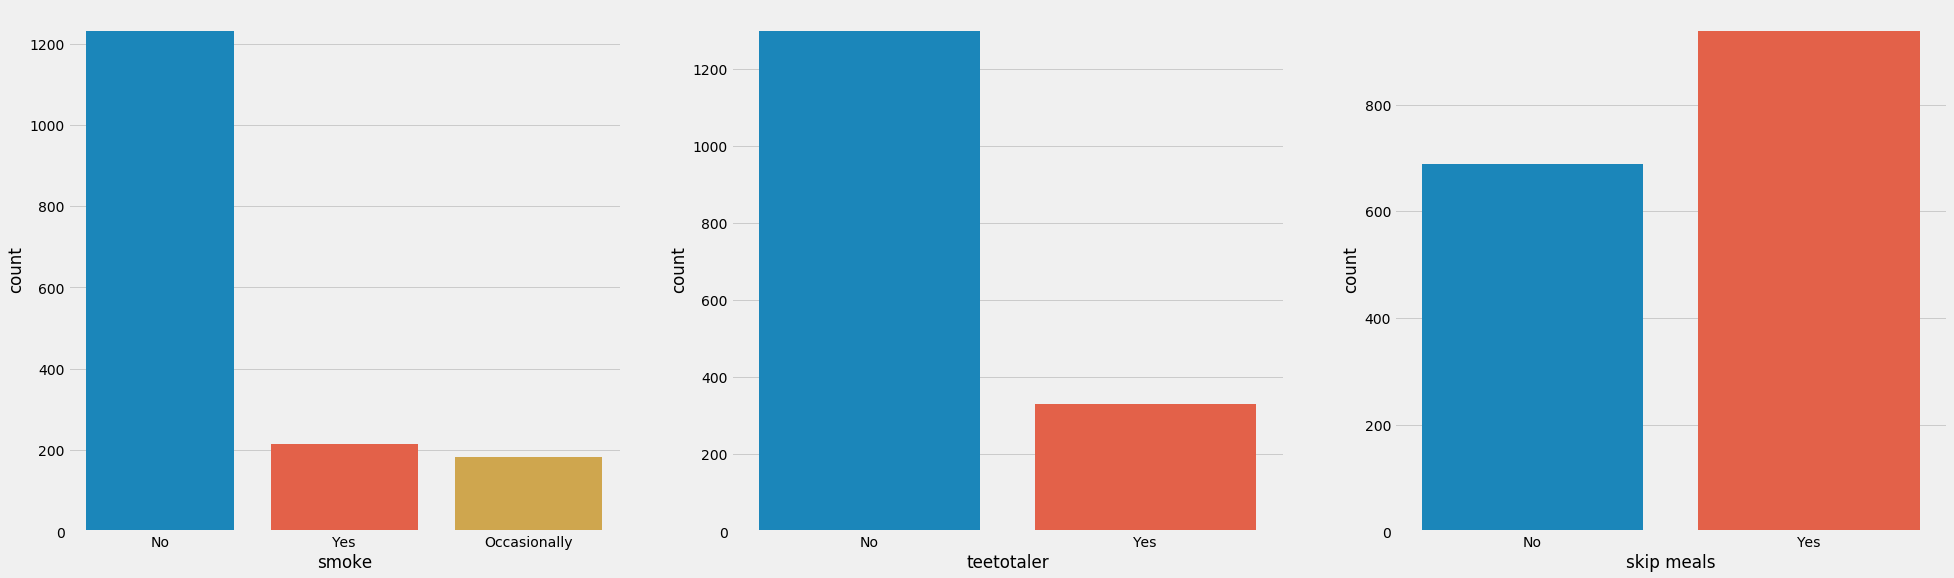

In [7]:
fig, axis = plt.subplots(1,3,figsize=(30,9))
sns.countplot(x='smoke', data=data, ax=axis[0])
sns.countplot(x='teetotaler', data=data, ax=axis[1])
sns.countplot(x='skip meals', data=data, ax=axis[2])

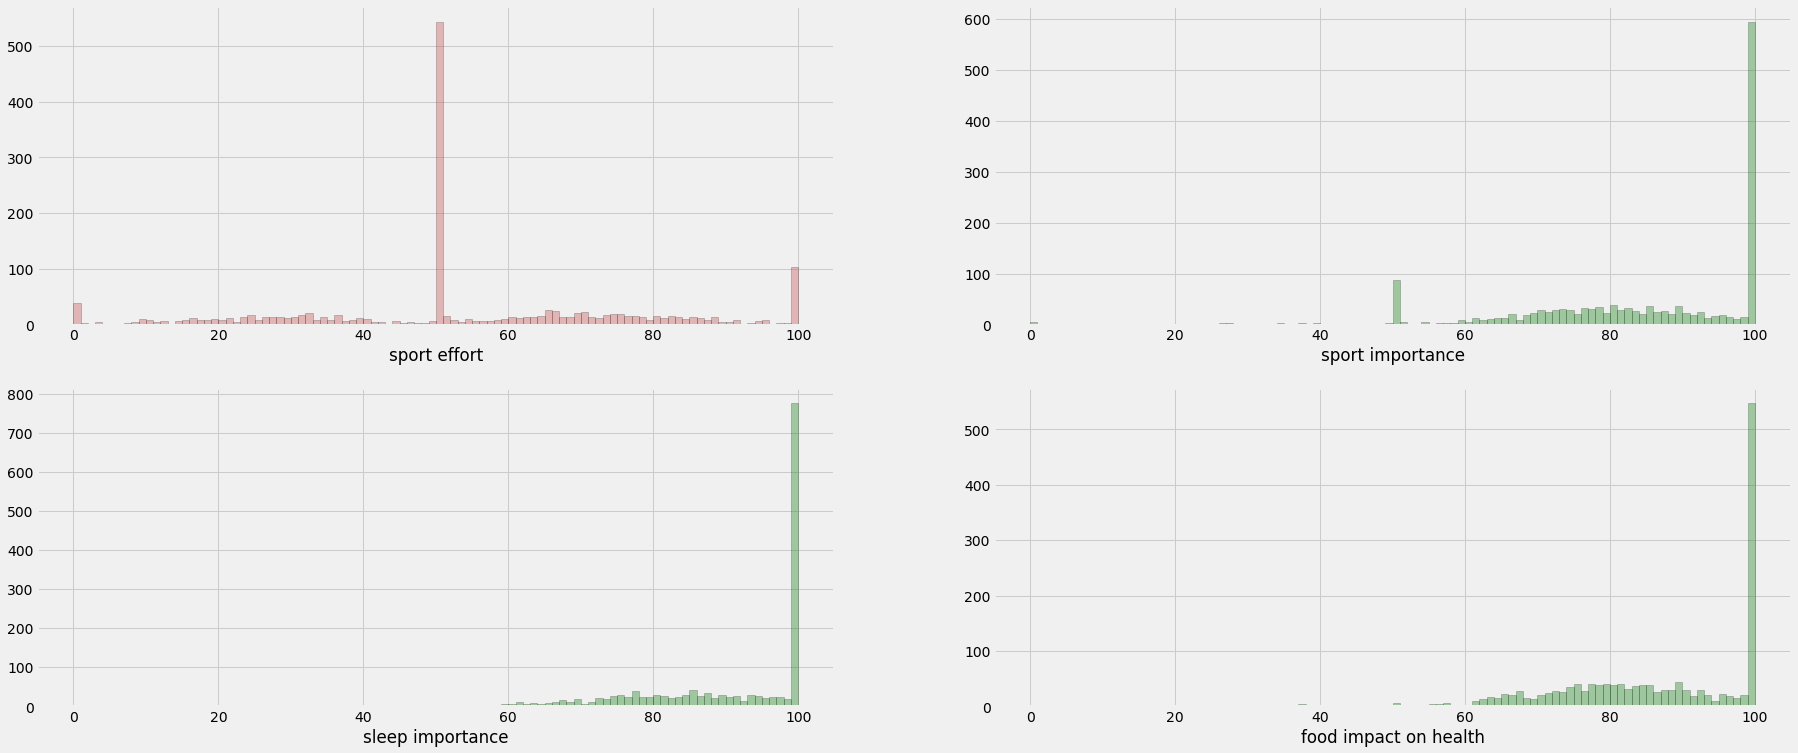

In [8]:
fig, axis = plt.subplots(2,2,figsize=(28, 12))

sns.distplot(data['sport effort'], kde=False, bins=100, color='indianred', hist_kws={'edgecolor':'black'}, ax=axis[0,0])

sns.distplot(data['sport importance'], kde=False, bins=100, color='forestgreen', hist_kws={'edgecolor':'black'}, ax=axis[0,1])

sns.distplot(data['sleep importance'], kde=False, bins=100, color='forestgreen', hist_kws={'edgecolor':'black'}, ax=axis[1,0])

sns.distplot(data['food impact on health'], kde=False, bins=100, color='forestgreen', hist_kws={'edgecolor':'black'}, ax=axis[1,1])

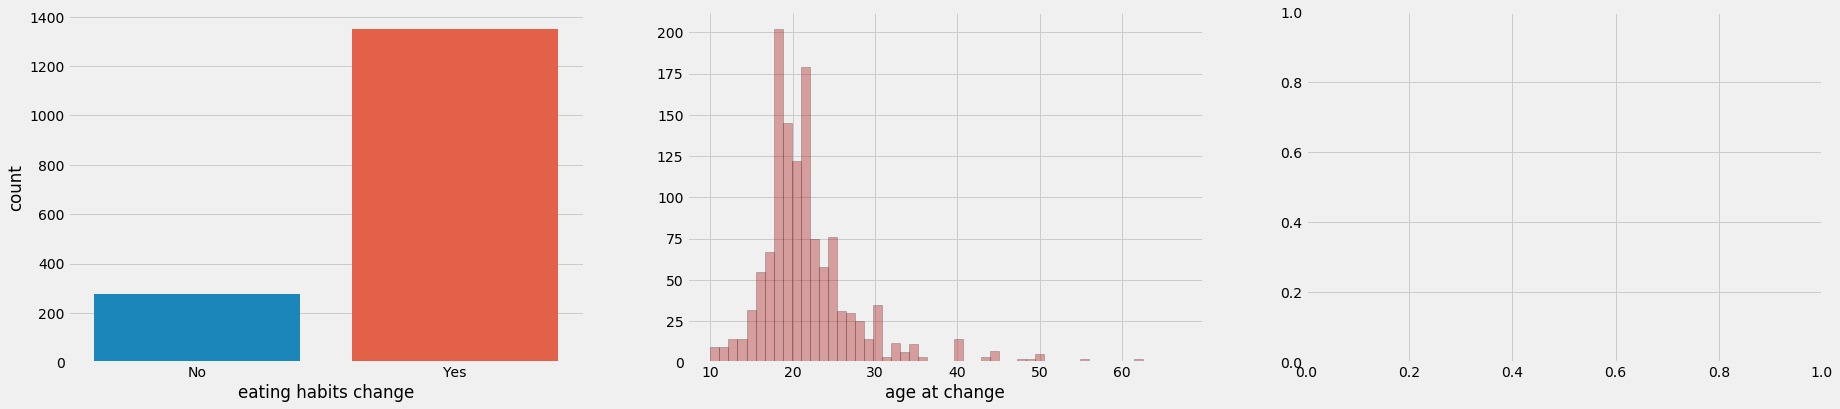

In [9]:
fig, axis = plt.subplots(1,3,figsize=(28,6))
sns.countplot(x='eating habits change', data=data, ax=axis[0])
tmp = data['age at change'].apply(lambda x:  int(x) if len(x) == 2 else None)
tmp.dropna(inplace=True)
sns.distplot(tmp, ax=axis[1], kde=False, color='firebrick', hist_kws={'edgecolor':'black'}, bins=52)



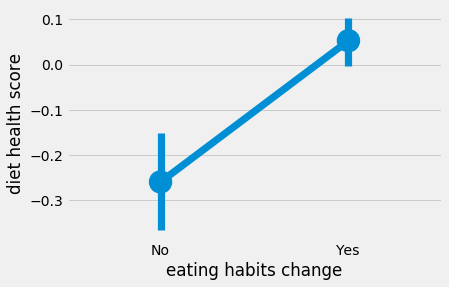

In [10]:
sns.pointplot(x='eating habits change', y='diet health score',  data=data)

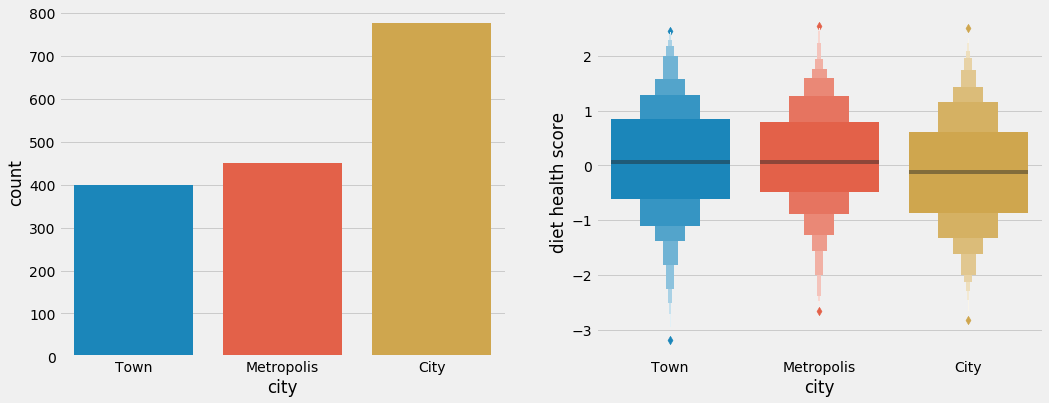

In [11]:
fig, axis = plt.subplots(1,2,figsize=(15.7,6))
sns.countplot(x='city', data=data, ax=axis[0])
sns.boxenplot(x='city', y='diet health score', data=data, ax=axis[1])

## Multivariate EDA

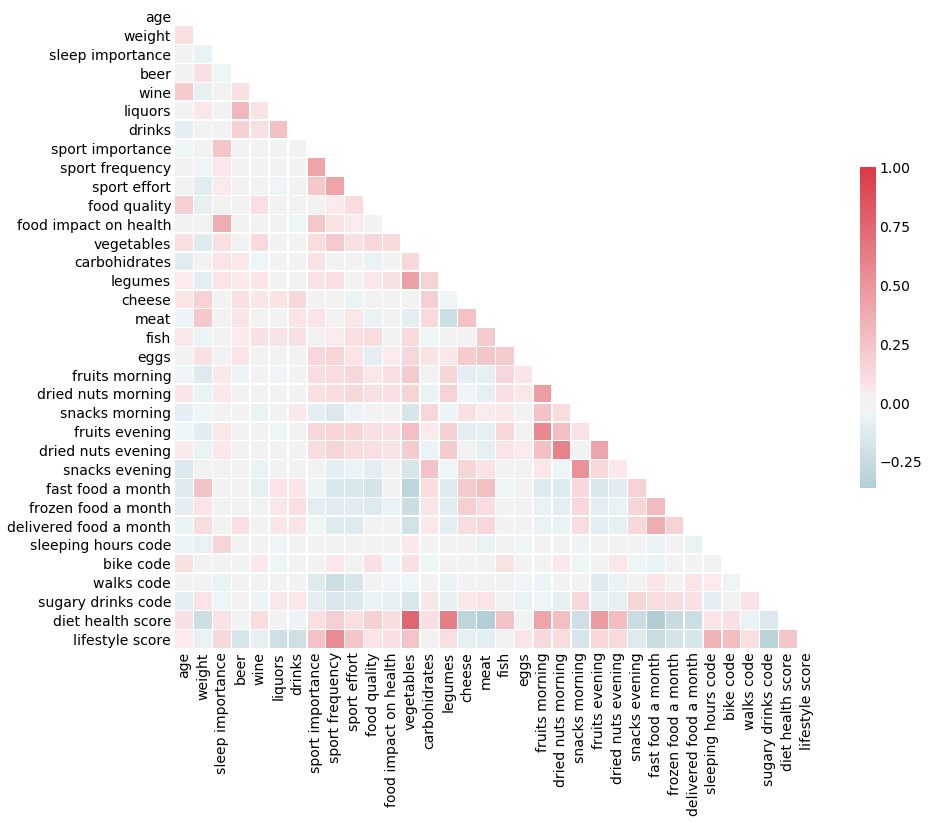

In [12]:
num_data = data.copy()

for i in num_data.columns:
    if (type(num_data[i].loc[22]) == str) or (num_data[i].loc[22] == 999):
        num_data = num_data.drop(i, axis=1)

corr = num_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.gcf().set_facecolor("white")
ax.set_facecolor("white")

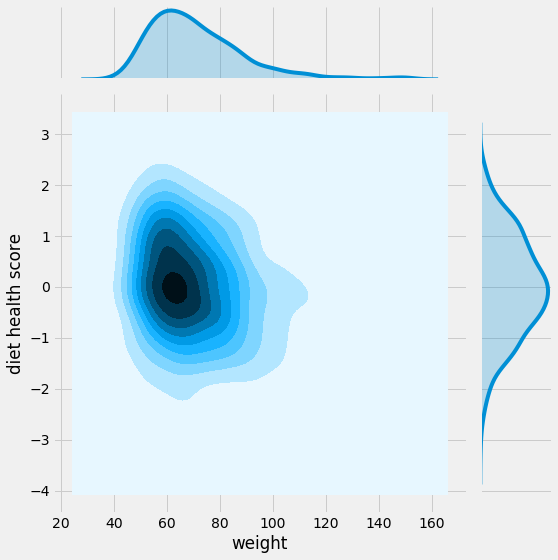

In [13]:
sns.jointplot(y='diet health score', x='weight', data=data, kind='kde', height=8)


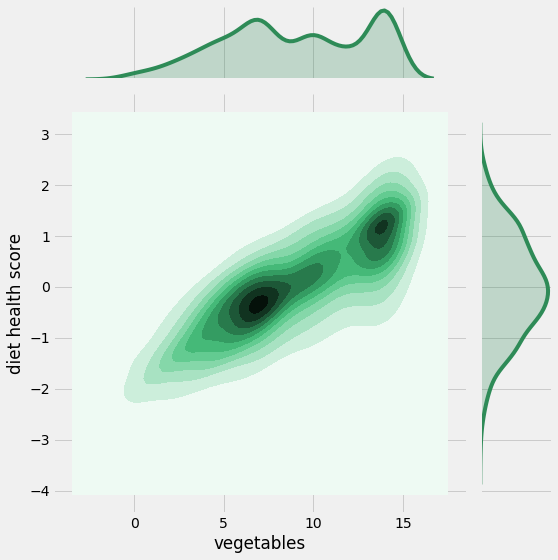

In [14]:
sns.jointplot(y='diet health score', x='vegetables', data=data, kind='kde', height=8, color='seagreen')

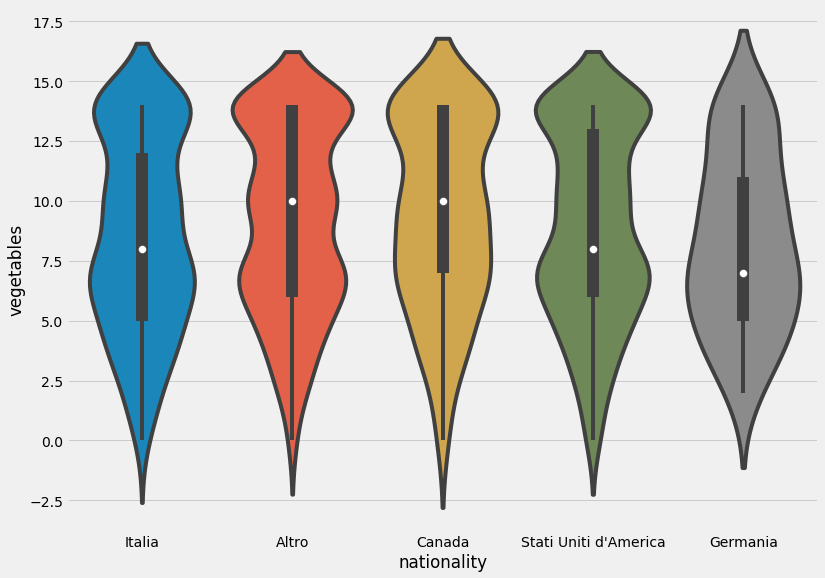

In [15]:
plt.figure(figsize=(12,9))
tmp = data.copy()
vc = tmp.nationality.value_counts()
tmp.nationality = tmp.nationality.apply(lambda x: 'Altro' if vc[x] < 40 else x)
tmp.nationality = tmp.nationality.apply(lambda x: "Stati Uniti d'America" if 'America' in x else x)

sns.violinplot(x='nationality', y='vegetables', data=tmp)

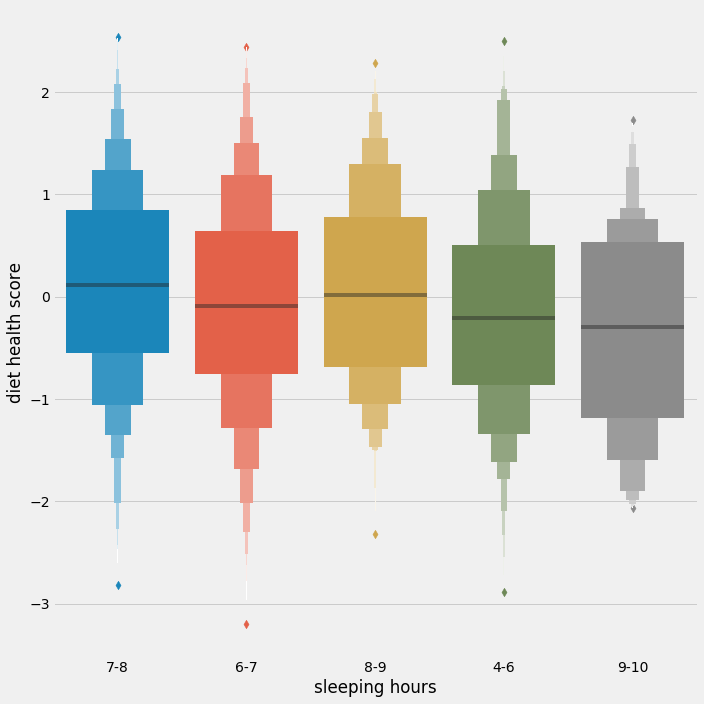

In [16]:
sns.catplot(x='sleeping hours', y='diet health score', data=data, kind='boxen',
                  height=10)

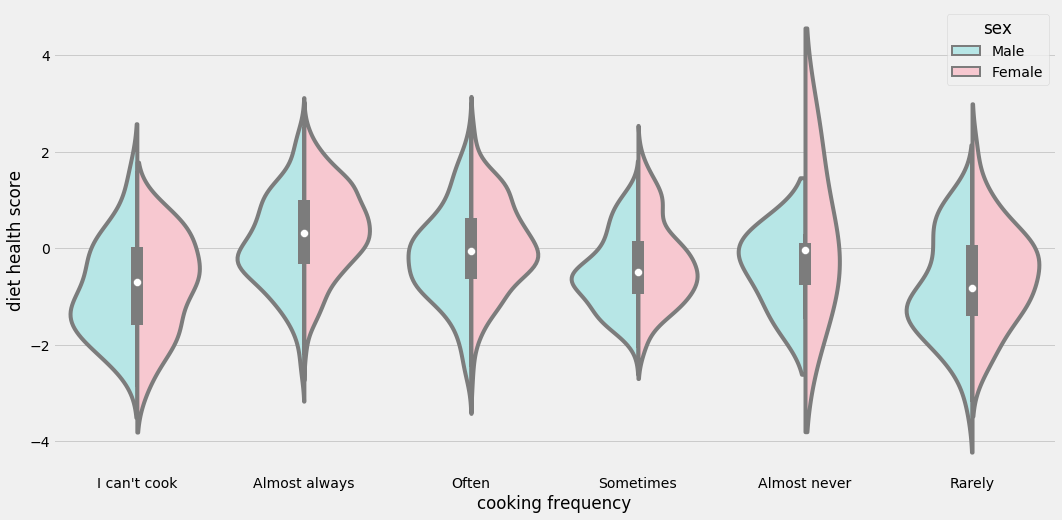

In [17]:
plt.figure(figsize=(16,8))
sns.violinplot(x='cooking frequency', y='diet health score', hue='sex', palette=['paleturquoise', 'pink'], data=data, split=True )

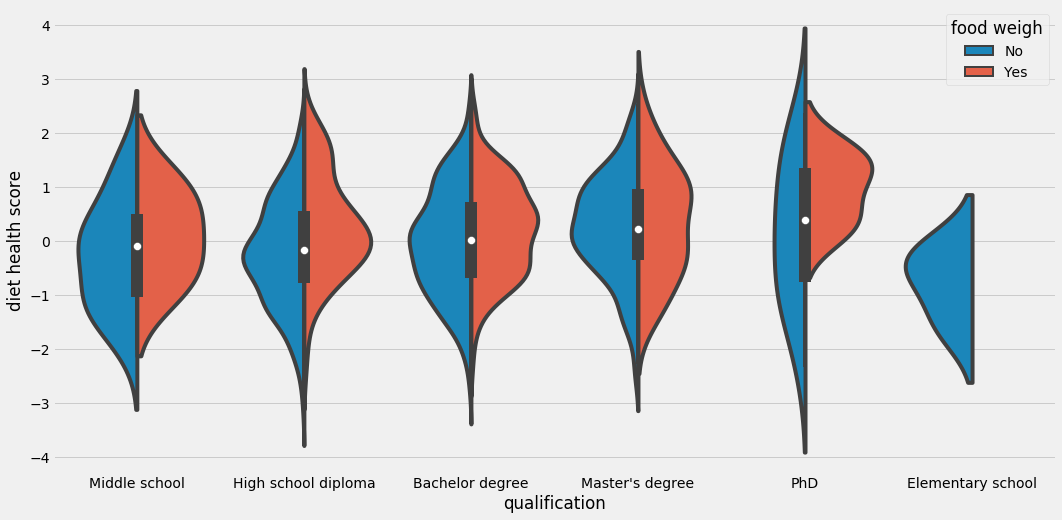

In [18]:
plt.figure(figsize=(16,8))
sns.violinplot(x='qualification', y='diet health score', hue='food weigh', data=data, 
               split=True )

<Figure size 1152x576 with 0 Axes>

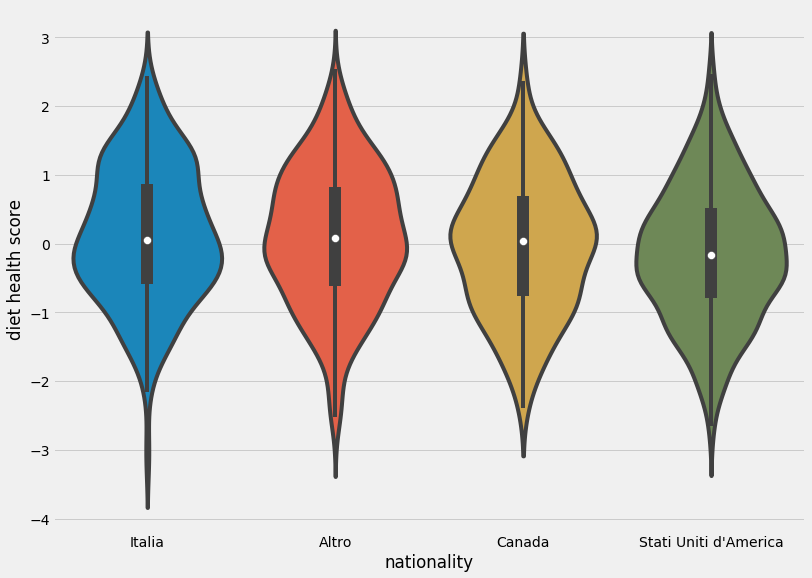

In [21]:
plt.figure(figsize=(16,8))
plt.figure(figsize=(12,9))
tmp = data.copy()
vc = tmp.nationality.value_counts()
tmp.nationality = tmp.nationality.apply(lambda x: 'Altro' if vc[x] < 80 else x)
tmp.nationality = tmp.nationality.apply(lambda x: "Stati Uniti d'America" if 'America' in x else x)

sns.violinplot(x='nationality', y='diet health score', data=tmp)
matplotlib.pyplot.savefig("test.svg", format="svg")